In [147]:
#importar bibliotecas requeridas
import matplotlib.pyplot as plt
import numpy as np
import math
from timeit import default_timer as timer


In [148]:
#Función, gradiente y Hessiano
def f(x):
    """Funcion a Evaluar"""
    f = 2*x[0]**2+2*x[0]*x[1]+10*x[1]**2 + 20 + 3*x[0]-4*x[1]
    return f


# gradiente  ∇f
def grad(x):
    g = np.array([
        4*x[0] + 2*x[1] + 3, 
        2*x[0] + 20*x[1] - 4
        ])
    return g


def hessiano(x):
    # return axay
    return np.array([
        [4, 2],
        [2, 20]
    ])


# dirección del gradiente p
def dirgrad(x):
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


In [149]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return(np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [150]:
#Forsyte
def exhaustivoRefinado(p, xini, alpha=0, h=0.1, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            fnow = phiAlpha(xini, alpha, p)
            # print(k, h, fnow)
            k += 1
        alpha = alpha-h
        h = h / 10
    return alpha


def gradDescent(x0):
    p = dirgrad(x0)
    alpha = exhaustivoRefinado(p, x0)
    # TODO: buscar alpha con newton para mayor precisión ?
    x0 = x0 + alpha*p
    return x0


def forsyte(x0, k=0, m=0, tol=1e-4):
    """Algoritmo de forsyte."""
    print("k, x^(k), p^(k), f(x^k), t")
    while np.linalg.norm(grad(x0)) >= tol:
        x1 = gradDescent(x0)
        x2 = gradDescent(x1)
        y = x2
        d = (y - x0)/np.linalg.norm(y - x0)
        alpha = exhaustivoRefinado(d, x0)
        # TODO: buscar alpha con newton para mayor precisión ?
        # print(f"alpha: {alpha}")
        x0 = x0 + alpha*d
        itTime = timer()
        print(f"{k}, {x0}, {d}, {f(x0)}, {itTime}")
        k = k + 1
    return x0


x0List = [20, 30]
x0 = np.array(x0List)
start = timer()
print(start)
xfin = forsyte(x0)


14999.52539241
k, x^(k), p^(k), f(x^k), t
0, [-0.89473677  0.28947473], [-0.57526009 -0.81797056], 18.07894736843214, 14999.573344435


In [151]:
#Desceso de Gradiente
def gradDescent(x0, k=0, tol=1e-4):
    print("k, x^(k), p^(k), f(x^(k), θ, t")
    op = dirgrad(x0)
    while np.linalg.norm(grad(x0)) >= tol:
        p = dirgrad(x0)
        alpha = exhaustivoRefinado(p, x0)
        # print(f"a: {alpha}")
        x0 = x0 + alpha*p
        if k >= 1:
            angulo = np.arccos(np.dot(op, p))
            op = p
            print(
                f"{k}, {x0}, {p} , {f(x0)}, {round(np.degrees(angulo),6)}, {timer()} ")
        else:
            print(f"{k}, {x0}, {p} , {f(x0)}, - , {timer()}")

        k = k+1


x0List = [20, 30]
x0 = np.array(x0List)
start = timer()
print(start)
xfin = gradDescent(x0)


14999.634699494
k, x^(k), p^(k), f(x^(k), θ, t
0, [12.88066581 -1.66361219], [-0.21936618 -0.9756426 ] , 381.9387396157358, - , 14999.656926414
1, [-0.19991077  1.27745777], [-0.97564265  0.21936596] , 30.178593605244984, 89.999987, 14999.664817841 
2, [-0.43665437  0.22452767], [-0.21936608 -0.97564262] , 18.481305055127486, 89.999993, 14999.666684486 
3, [-0.87163626  0.32232371], [-0.97564571  0.21935232] , 18.09232359053401, 89.999192, 14999.668578726 
4, [-0.8795072   0.28731562], [-0.2193564 -0.9756448] , 18.07939209156986, 89.999761, 14999.675265088 
5, [-0.89397343  0.29056195], [-0.9757333  0.2189624] , 18.07896203897183, 89.976863, 14999.677945459 
6, [-0.89423349  0.28940379], [-0.21909166 -0.97570428] , 18.078947853641004, 89.99241, 14999.680942469 
7, [-0.89471706  0.28950473], [-0.97890175  0.20433151] , 18.07894738007225, 89.134682, 14999.684837621 
8, [-0.89472396  0.28947246], [-0.20905362 -0.97790418] , 18.07894736873624, 89.723471, 14999.68682637 


In [152]:
# Gradiente Conjugado

def almd(x0, r, p):
    return -np.dot(r, p) / np.dot(np.dot(hessiano(x0), p), p)


def beta(x0, r, p):
    return np.dot(np.dot(hessiano(x0), p), r)/np.dot(np.dot(hessiano(x0), p), p)


def gradConjugado(x0, b, k=0, tol=1e-6):
    r = grad(x0)
    p = r*-1
    print(x0)
    print("x0, f(x^k), aMD, b")
    while np.linalg.norm(grad(x0)) >= tol:
        aMD = almd(x0, r, p)
        x0 = x0 + aMD*p
        r = np.dot(hessiano(x0), x0) - b
        b = beta(x0, r, p)
        p = -r + b*p
        print(x0, f(x0),aMD, b)
    return x0


x0 = np.array([20, 30])
b =[-3, 4]
print(gradConjugado(x0,b))


[20 30]
x0, f(x^k), aMD, b
[12.88066569 -1.66361276] 381.9387396157323 0.04978555465005715 0.006479601263520734
[-0.89473684  0.28947368] 18.07894736842105 0.2642914160408375 0.07259452425434619
[-0.89473684  0.28947368]


[12.88066581, -1.66361219]
[-0.19991077, 1.27745777]
[-0.43665437, 0.22452767]
[-0.87163626, 0.32232371]
[-0.8795072, 0.28731562]
[-0.89397343, 0.29056195]
[-0.89423349, 0.28940379]
[-0.89471706, 0.28950473]


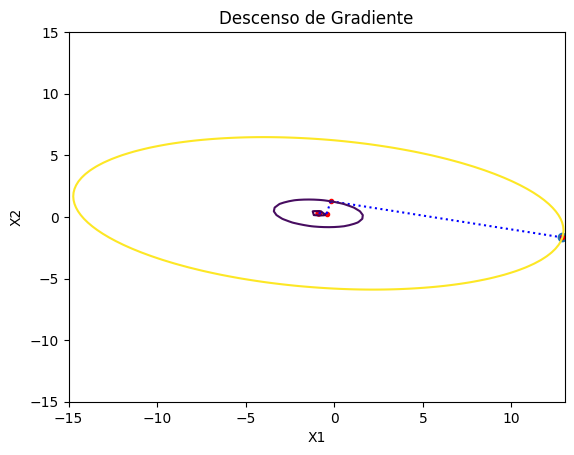

In [173]:
# Grafica Descenso de Gradiente

x = np.linspace(-15, 13, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)

aux = [X, Y]
Z = f(aux)
levels = [
    # 10960, 
    381.9387396157358, 30.178593605244984, 18.481305055127486, 18.09232359053401,
          18.07939209156986, 18.07896203897183, 18.078947853641004, 18.07894738007225, 18.07894736873624]


levels.reverse()
# print(L)


dots = [
    # [20, 30],
    [12.88066581, - 1.66361219],
    [-0.19991077, 1.27745777],
    [-0.43665437, 0.22452767],
    [-0.87163626, 0.32232371],
    [-0.8795072,  0.28731562],
    [-0.89397343, 0.29056195],
    [-0.89423349, 0.28940379],
    [-0.89471706, 0.28950473],
    [-0.89472396, 0.28947246]
]
dots.reverse


plt.scatter(dots[0][0], dots[0][1], marker="o")
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], marker=".", color="red")
    if i < len(dots)-1:
        print(dots[i])
        plt.plot([dots[i][0], dots[i+1][0]], [dots[i][1], dots[i+1][1]], "b:")


plt.title('Descenso de Gradiente')
plt.contour(X, Y, Z, levels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


[20, 30]


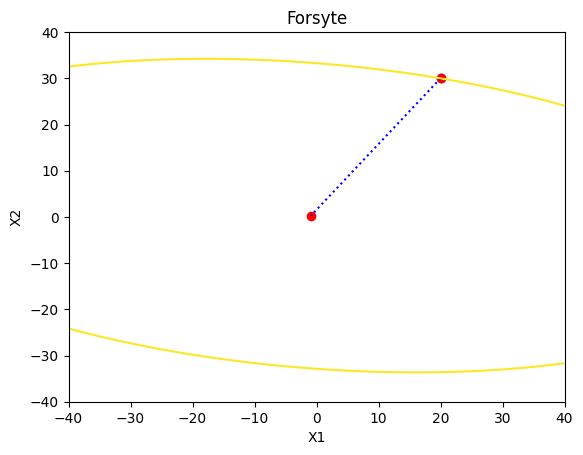

In [154]:
# Gráfica Forsyte

x = np.linspace(-40, 40, 100)
y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(x, y)
aux = [X, Y]
Z = f(aux)

levels = [10960, 18.07894736843214] 
levels.reverse()

dots = [
    [20, 30], [-0.89473677, 0.28947473]
]


plt.scatter(dots[0][0], dots[0][1], marker="o")
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], marker="o", color="red")
    if i < len(dots)-1:
        print(dots[i])
        plt.plot([dots[i][0], dots[i+1][0]], [dots[i][1], dots[i+1][1]], "b:")


plt.title('Forsyte')
plt.contour(X, Y, Z, levels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


[20, 30]
[12.88066569, -1.66361276]


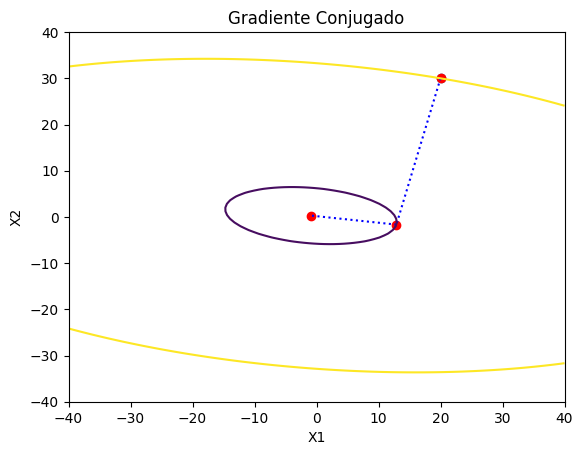

In [157]:
# Gradiente Conjugado

x = np.linspace(-40, 40, 100)
y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(x, y)
aux = [X, Y]
Z = f(aux)

levels = [10960, 381.9387396157323, 18.07894736843214]
levels.reverse()

dots = [
    [20, 30],
    [12.88066569, - 1.66361276], [-0.89473677, 0.28947473],
]


plt.scatter(dots[0][0], dots[0][1], marker="o")
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], marker="o", color="red")
    if i < len(dots)-1:
        print(dots[i])
        plt.plot([dots[i][0], dots[i+1][0]], [dots[i][1], dots[i+1][1]], "b:")


plt.title('Gradiente Conjugado')
plt.contour(X, Y, Z, levels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


[20, 30]
[12.88066581, -1.66361219]
[-0.19991077, 1.27745777]
[-0.43665437, 0.22452767]
[-0.87163626, 0.32232371]
[-0.8795072, 0.28731562]
[-0.89397343, 0.29056195]
[-0.89423349, 0.28940379]
[-0.89471706, 0.28950473]
[20, 30]
[12.88066569, -1.66361276]


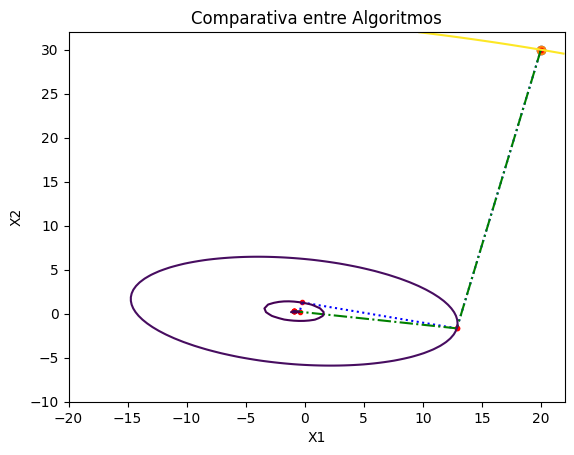

In [182]:
# Descenso de Grad Vs Gradiente Conjugado
x = np.linspace(-20, 22, 100)
y = np.linspace(-10, 32, 100)
X, Y = np.meshgrid(x, y)
aux = [X, Y]
Z = f(aux)

levels = [10960, 381.9387396157358, 30.178593605244984, 18.481305055127486, 18.09232359053401,
          18.07939209156986, 18.07896203897183, 18.078947853641004, 18.07894738007225, 18.07894736873624]
levels.reverse()

# dots gradiente
dots = [
    [20, 30],
    [12.88066581, - 1.66361219],
    [-0.19991077, 1.27745777],
    [-0.43665437, 0.22452767],
    [-0.87163626, 0.32232371],
    [-0.8795072,  0.28731562],
    [-0.89397343, 0.29056195],
    [-0.89423349, 0.28940379],
    [-0.89471706, 0.28950473],
    [-0.89472396, 0.28947246]
]

conjuDots = [
    [20, 30],
    [12.88066569, - 1.66361276], [-0.89473677, 0.28947473],
]

forsyteDots = [[20, 30], [-0.89473677, 0.28947473]]

# plot dots gradiente
def plotDots(dots,colorLine="b:"):
    plt.scatter(dots[0][0], dots[0][1], marker="o")
    for i in range(len(dots)):
        plt.scatter(dots[i][0], dots[i][1], marker=".", color="red")
        if i < len(dots)-1:
            print(dots[i])
            plt.plot([dots[i][0], dots[i+1][0]], [dots[i][1], dots[i+1][1]], colorLine,)
            # plt.legend(loc=0)

# Descenso Gradiente
plotDots(dots)
# Gradiente Conjugado
# plotDots(forsyteDots, "o--")
plotDots(conjuDots, "g-.")

plt.title('Comparativa entre Algoritmos')
plt.contour(X, Y, Z, levels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
